# Final exercise and summary

## Final exercise

In this exercise, we'll be calculating the pressue of gas inside a closed 2D box as the box is heated. We'll be making use of the ideal gas law for this exercise

As a reminder, the ideal gas law is PV = NkT.

Here, P is the pressre, V is the volume, N is the number of molecules, k is the Boltzman constant, and T is the temperature. 

For the initial condition, we'll assume standard temperature i.e. 273.15 K. We'll assume the box is cubic with sides of 1 m length and contains 2.5 x 10^25 molecules of gas.

The Boltzman constant is 1.380e-23 J/K
1 atmosphere = 101325 N/m^2

1.  Write a function to calculate the pressure inside the box as the temperature is increased. N, T, and V should be inputs to this function. The pressure should be output in units of N/m^2

2. Verify that at the initial temperature (273.15 K) the pressure is 94236.75 N/m^2

3.  Compute how the pressure in the box varies as the temperature increases between T = 273.15 K and T = 773.15 K. Your input array should contain 500 values. What is the  pressure in the box at the start and finish temperatures in units of atmospheres?

4. Make a labelled plot showing the input temperature and output pressure, in units of atmosphere. 

5. Save the output from this function as a table. 

6. Read in the saved table from the previous part of the exercise.

7. For each temperature in your table, calculate the average kinetic energy per molecule:

$$ \frac{1}{2}m v^{2} = \frac{3}{2}k_{B}T$$

8. Add this as a new column to your table, and save the result.

9. Make a labelled plot showing average kinetic energy as a function of pressure.



In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
boltzmann = 1.380e-23

def pressure(N, T, V):
    return N * boltzmann * T / V

In [3]:
pressure(2.5e25, 273.15, 1)

94236.75000000001

In [11]:
temperature = np.linspace(273.15, 773.15, 500)
pressure_arr = pressure(2.5e25, temperature, 1)

pressure_arr[0], pressure_arr[-1]

(np.float64(94236.75000000001), np.float64(266736.75000000006))

In [5]:
pressure_atmospheres = pressure_arr / 101325

Text(0, 0.5, 'Pressure, atm')

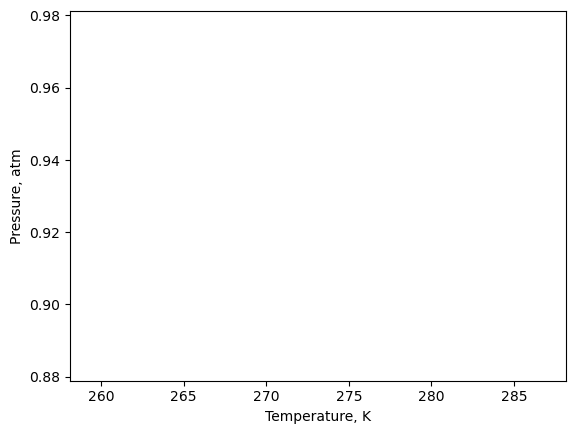

In [6]:
plt.plot(temperature, pressure_atmospheres)
plt.xlabel("Temperature, K")
plt.ylabel("Pressure, atm")

In [7]:
import pandas as pd

data_dict = {}
data_dict["temperature"] = temperature
data_dict["pressure"] = pressure_arr

df_out = pd.DataFrame(data_dict)
df_out.to_hdf('pressure_temperature.hdf', key='data')

In [8]:
df_in = pd.read_hdf('pressure_temperature.hdf', key='data')

pressure_file = df_in['pressure']
temperature_file = df_in['temperature']

In [9]:
ke_per_molecule = 1.5 * boltzmann * temperature_file

df_in["ke_per_molecule"] = ke_per_molecule
df_in.to_hdf('pressure_temperature_ke.hdf', key='data')


Text(0, 0.5, 'Average kinetic energy per molecule, J')

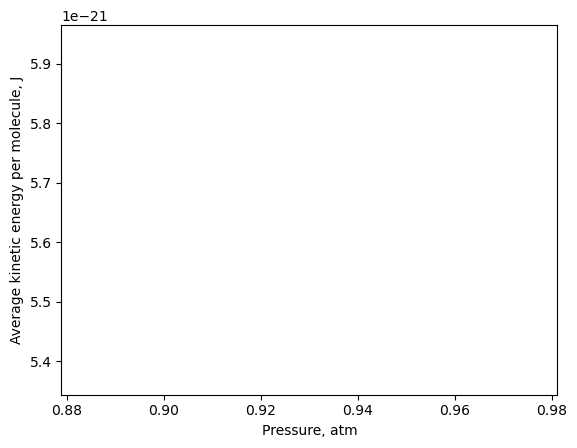

In [10]:
plt.plot(pressure_atmospheres, ke_per_molecule)

plt.xlabel("Pressure, atm")
plt.ylabel("Average kinetic energy per molecule, J")

## Summary

We've explored some additional features of numpy and pandas in this lecture. However, numpy (and scipy) have *many* features. Knowing all of them:

https://docs.scipy.org/doc/numpy/genindex.html

is not realistic! So often when approaching a problem it's worth formulating what you want to do and then checking if a solution already exists for this problem. Clearly formulating the problem maximizes the chance of finding a useful stackoverflow post!